# Heart Disease Dataset

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score


In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


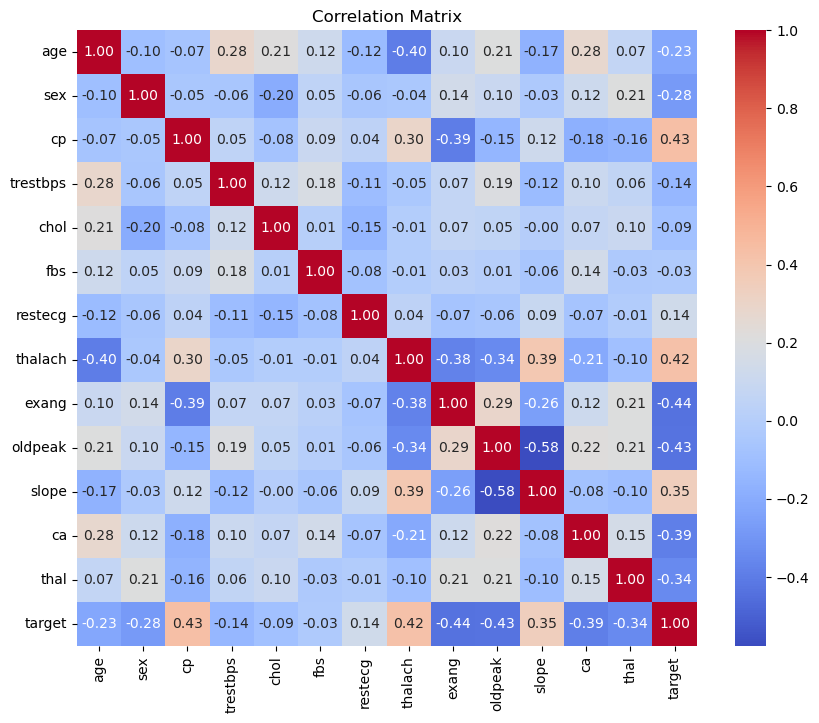

In [60]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig(r'C:\Users\khanm29\Downloads\correlation_matrix.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [61]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [63]:
# Descriptive statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [2]:
# Load the dataset
df = pd.read_csv('heart-disease.csv')
# Split the dataset into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and a temporary set (75% training, 25% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# Split the temporary set into validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features        
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


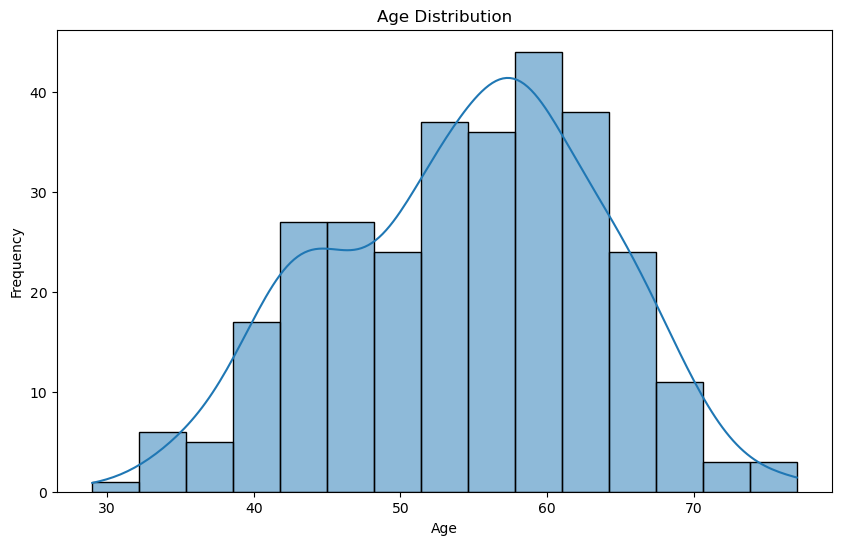

In [64]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

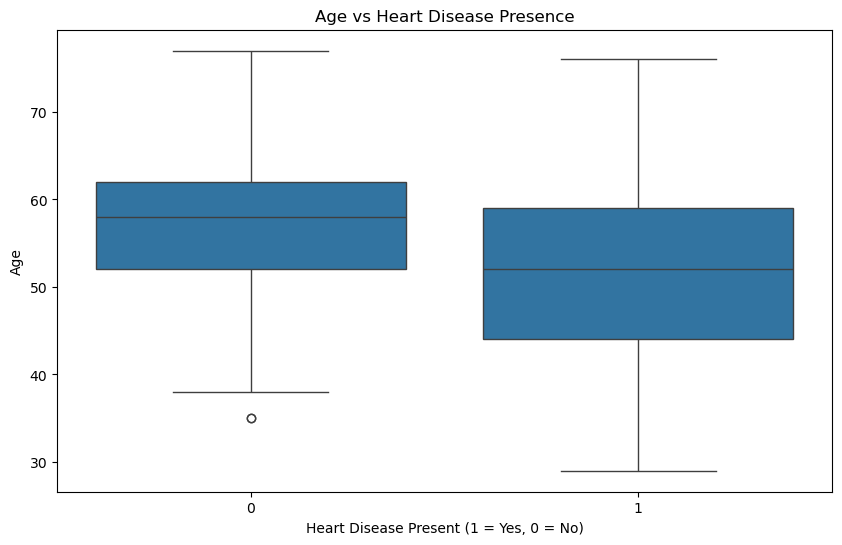

In [65]:
# Relationship between age and target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Heart Disease Presence')
plt.xlabel('Heart Disease Present (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()

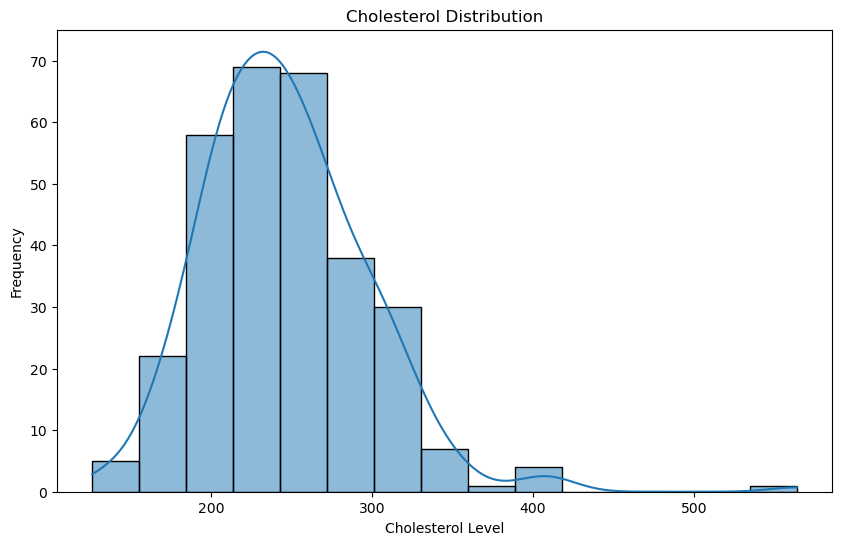

In [66]:
# Cholesterol distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], bins=15, kde=True)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()

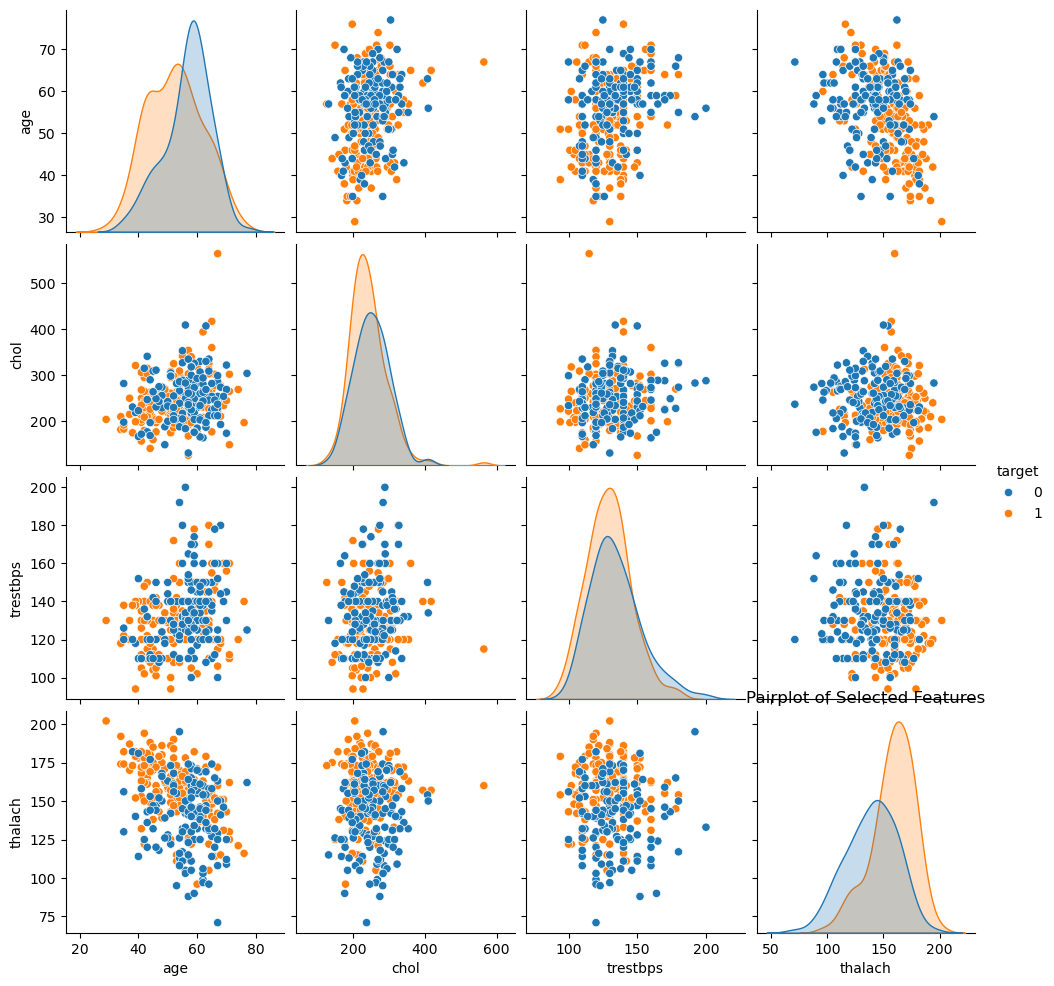

In [67]:
# Pairplot for a few selected features
sns.pairplot(df, hue='target', vars=['age', 'chol', 'trestbps', 'thalach'])
plt.title('Pairplot of Selected Features')
plt.show()


In [3]:
len(X_test), len(X_val), len(X_train)

(38, 38, 227)

## 1. Model selection
Apart from exploring the whole dataset for right choosing the right estimator we also followed the the Scikit-Leanrn model selection flowchart.

<img src = ml_map.svg >

### 1.1 Logistic Regression

In [4]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression()

#### 1.1.1 Loss Function for Logistic Regression

In [5]:
# Predict probabilities for the training set
y_train_pred_probs = log_reg.predict_proba(X_train)
log_loss_train = log_loss(y_train, y_train_pred_probs)

# Predict probabilities for the validation set
y_val_pred_probs = log_reg.predict_proba(X_val)
log_loss_val = log_loss(y_val, y_val_pred_probs)


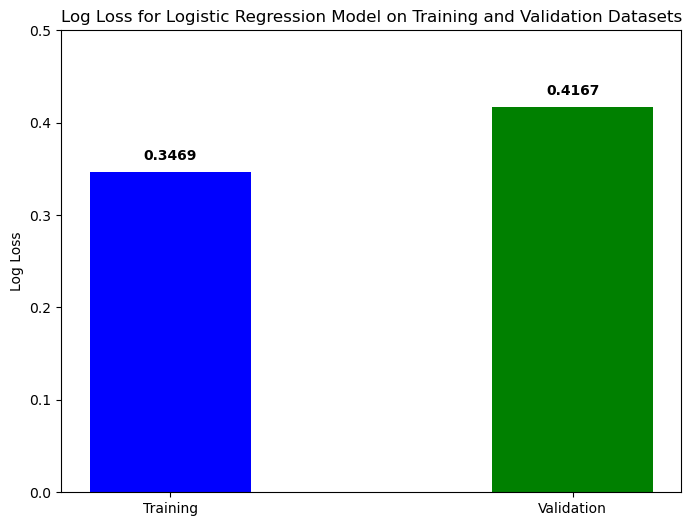

In [6]:
# Create a bar graph to compare the Log Loss for training and validation datasets
labels = ['Training', 'Validation']
log_loss_values = [log_loss_train, log_loss_val]

# Adjust the bar width
bar_width = 0.4

# Set the figure size
plt.figure(figsize=(8, 6))  # Adjust the width and height as needed

plt.ylim(0, 0.5)

plt.bar(labels, log_loss_values, width=bar_width, color=['blue', 'green'])
plt.ylabel('Log Loss')
plt.title('Log Loss for Logistic Regression Model on Training and Validation Datasets')

# Display the values on top of the bars in bold form
for i, v in enumerate(log_loss_values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.show()

#### 1.1.2 Making prediction on Validation dataset

In [7]:
# Make predictions on the validation set
y_pred_val_log_reg = log_reg.predict(X_val)
# Evaluate the model on the validation set
accuracy_log_reg = accuracy_score(y_val, y_pred_val_log_reg)
conf_mat_val_log_reg = confusion_matrix(y_val, y_pred_val_log_reg)
print(f"Logistic Regression Validation Accuracy: {accuracy_log_reg:.4f}")



Logistic Regression Validation Accuracy: 0.8684


### 1.2 KNeigbours Classifier

In [8]:
# Initialize the KNN model with default parameters
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [9]:
# Making predictions on Training data
y_pred_train_knn = knn.predict(X_train)
# Make predictions on the validation set
y_pred_val_knn = knn.predict(X_val)


#### 1.2.1 `0/1` Loss function for KNeigbours Classifier

In [10]:
zero_one_loss_train=1-  accuracy_score(y_train, y_pred_train_knn)
zero_one_loss_val= 1 - accuracy_score(y_val, y_pred_val_knn)

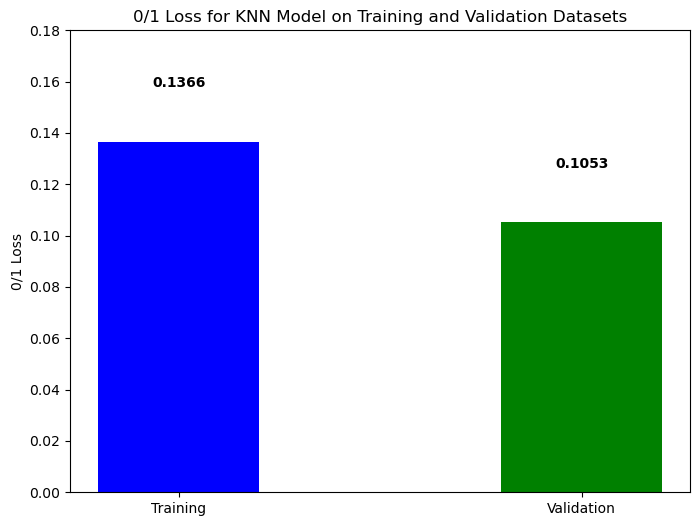

In [11]:
# Define labels and loss values
labels = ['Training', 'Validation']
loss_values = [zero_one_loss_train, zero_one_loss_val]

# Adjust the bar width
bar_width = 0.4

# Set the figure size
plt.figure(figsize=(8, 6))  # Adjust the width and height as needed

# Plot the bar chart
plt.bar(labels, loss_values, width=bar_width, color=['blue', 'green'])
plt.ylabel('0/1 Loss')
plt.title('0/1 Loss for KNN Model on Training and Validation Datasets')

# Set the y-axis limits
plt.ylim(0, 0.18)

# Display the values on top of the bars in bold form
for i, v in enumerate(loss_values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

plt.show()

#### 1.2.2 Making predictions on the validation dataset

In [12]:
# Evaluate the KNN model on the validation set
accuracy_knn = accuracy_score(y_val, y_pred_val_knn)
conf_mat_val_knn = confusion_matrix(y_val, y_pred_val_knn)
print(f"KNN Validation Accuracy: {accuracy_knn:.4f}")


KNN Validation Accuracy: 0.8947


### 1.3 RandomForreRandomForestClassifier

In [13]:
# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42, criterion='gini')

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val_rf = rf_classifier.predict(X_val)
# Evaluate the Random Forest Classifier model on the validation set
accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
conf_mat_val_rf = confusion_matrix(y_val, y_pred_val_rf)
print(f"Random Forest Classifier Validation Accuracy: {accuracy_rf:.4f}")



Random Forest Classifier Validation Accuracy: 0.8158


### 1.4 Validation Accuracy of Each Utilized Machine Learning Model

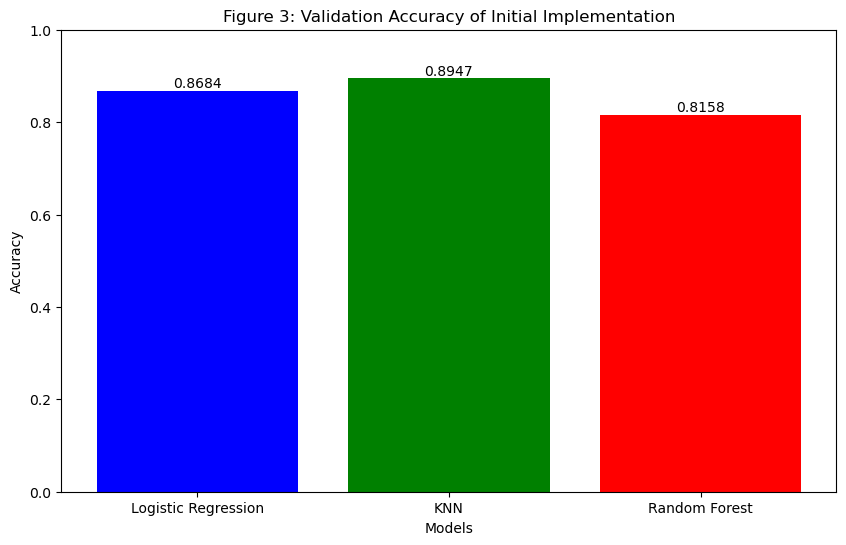

In [15]:
# Model names
models = ['Logistic Regression', 'KNN', 'Random Forest']

# Corresponding accuracies
accuracies = [accuracy_log_reg, accuracy_knn, accuracy_rf]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Figure 3: Validation Accuracy of Initial Implementation')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', 
             ha='center', va='bottom')

plt.show()

### 1.5 Confusion Matrix for Each Utilized Method

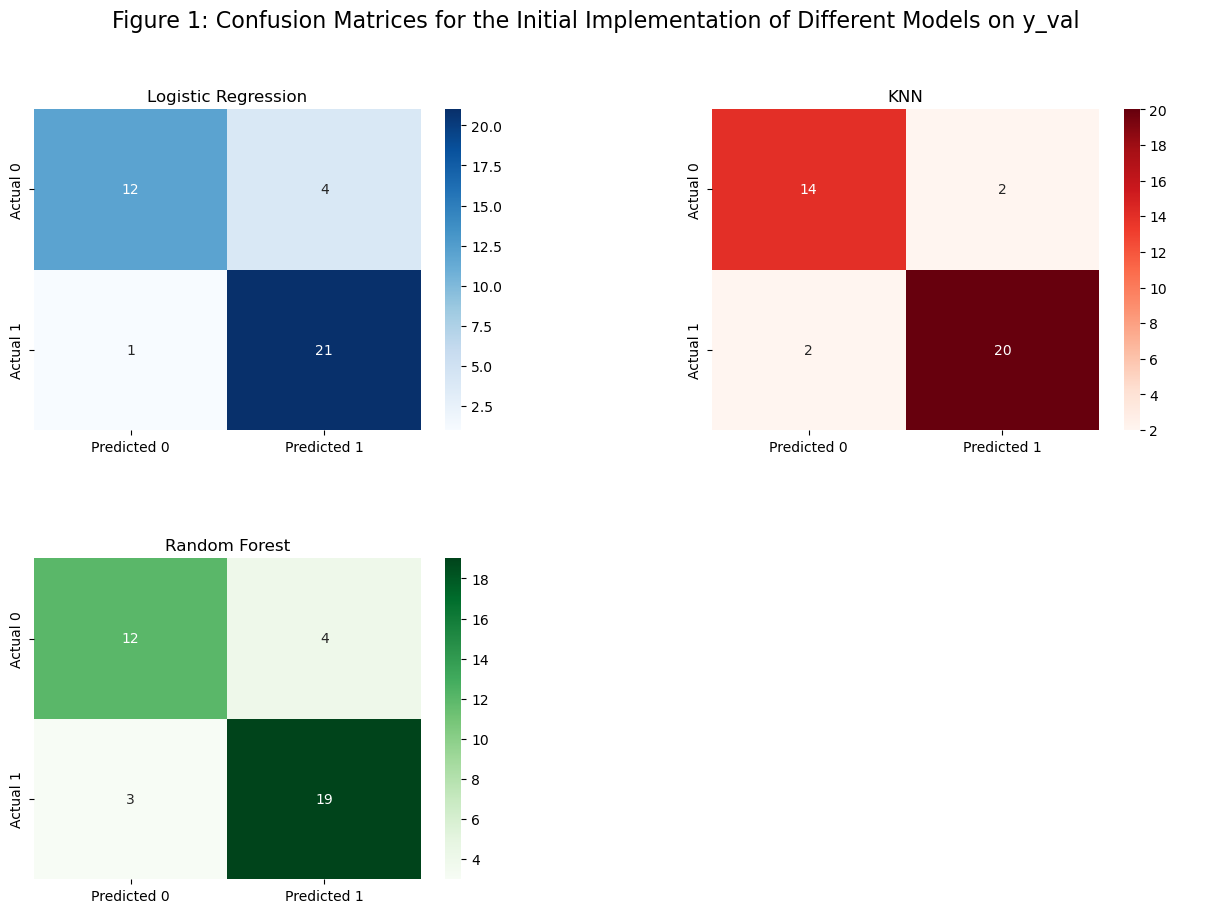

In [16]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Add a main title
fig.suptitle('Figure 1: Confusion Matrices for the Initial Implementation of Different Models on y_val', fontsize=16)

# Plot the confusion matrix for Logistic Regression
sns.heatmap(conf_mat_val_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')

# Plot the confusion matrix for KNN
sns.heatmap(conf_mat_val_knn, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[0, 1])
axes[0, 1].set_title('KNN')

# Plot the confusion matrix for Random Forest
sns.heatmap(conf_mat_val_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[1, 0])
axes[1, 0].set_title('Random Forest')

# Remove the empty subplot
axes[1, 1].axis('off')

# Adjust layout with spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

## 2. Hyperparameters Tuning Using GridSearchCV or RandomizedSearchCV

As it can be seen from the above results that KNeigbours give the best results for simple implementation. However, we can not be sure at the moment about the final model selection as it is also possible that other model may outperform it if tuned in a good way. Therfore, first we need to tune all above models to look for the best hyperparametr and best estimator. It is also a good practice to take into account the Cross Validation.

### 2.1 Logistic Regression Hypertuning

In [17]:
# Define the parameter grid
param_grid_log_reg = {
    'C': np.logspace(-4, 4, 30),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the Grid Search with cross-validation
grid_search_log_reg = GridSearchCV(LogisticRegression(),
                                   param_grid_log_reg,
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1)

# Fit the Grid Search to the training data
grid_search_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [18]:
# Get the best parameters and best estimator
best_params_log_reg = grid_search_log_reg.best_params_
best_log_reg_classifier = grid_search_log_reg.best_estimator_

# Make predictions on the validation set using the best model
y_pred_val_best_log_reg = best_log_reg_classifier.predict(X_val)
accuracy_val_best_log_reg = accuracy_score(y_val, y_pred_val_best_log_reg)
conf_mat_val_best_log_reg  = confusion_matrix(y_val, y_pred_val_best_log_reg)

# Best Parameters
print(f"Best Logistic Regression Parameters: {best_params_log_reg}")

Best Logistic Regression Parameters: {'C': 0.002395026619987486, 'penalty': 'l2', 'solver': 'liblinear'}


In [19]:
# Evaluate the best model on the validation set
print(f"Best Logistic Regression Validation Accuracy: {accuracy_val_best_log_reg:.4f}")

Best Logistic Regression Validation Accuracy: 0.8684


In [20]:
print("Classification Report for Best Logistic Regression Model on Validation Set:")
print(classification_report(y_val, y_pred_val_best_log_reg))

Classification Report for Best Logistic Regression Model on Validation Set:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.84      0.95      0.89        22

    accuracy                           0.87        38
   macro avg       0.88      0.85      0.86        38
weighted avg       0.87      0.87      0.87        38



### 2.2 KneighboursClassifier Hypertuning

In [21]:
# Define the parameter grid
param_grid_knn = {
    #'n_neighbors': [5, 7, 9, 11],  # Uncomment this line to test multiple values
    'n_neighbors': [7],  # Comment this line if you want to test multiple values
    'weights': ['uniform', 'distance'],
}

# Initialize the Grid Search with cross-validation
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the training data
grid_search_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [7],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

#### 2.2.1 Best KNeigboursClassifier

In [22]:
# Get the best parameters and best estimator
best_params_knn = grid_search_knn.best_params_
best_knn_classifier = grid_search_knn.best_estimator_


# Make predictions on the validation set using the best KNN model
y_pred_val_best_knn = best_knn_classifier.predict(X_val)
accuracy_val_best_knn = accuracy_score(y_val, y_pred_val_best_knn)

conf_mat_val_best_knn = confusion_matrix(y_val, y_pred_val_best_knn)

# Evaluate the best KNN model on the validation set
print(f"Best KNN Parameters: {best_params_knn}")


Best KNN Parameters: {'n_neighbors': 7, 'weights': 'uniform'}


In [23]:
print(f"Best KNN Validation Accuracy: {accuracy_val_best_knn:.4f}")


Best KNN Validation Accuracy: 0.9211


In [24]:
print("Classification Report for Best KNN Model on Validation Set:")
print(classification_report(y_val, y_pred_val_best_knn))

Classification Report for Best KNN Model on Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.91      0.95      0.93        22

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.92        38
weighted avg       0.92      0.92      0.92        38



### 2.3 RandomForrest Classifier Hypertuning

In [25]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Grid Search with cross-validation
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, criterion='gini'), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the training data
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

#### 2.3.1 Best RandomForrestClassifier

In [26]:
# Get the best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_rf_classifier = grid_search_rf.best_estimator_

# Make prediction of 
# Make predictions on the validation set using the best model
y_pred_val_best_rf = best_rf_classifier.predict(X_val)
accuracy_val_best_rf = accuracy_score(y_val, y_pred_val_best_rf)
conf_mat_val_best_rf = confusion_matrix(y_val, y_pred_val_best_rf)

# Get the best Parameters
print("Best Random Forest Classifier Parameters:", best_params_rf)

Best Random Forest Classifier Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}


In [27]:
# Evaluate the best model on the validation set
print("Best Random Forest Classifier Parameters:", best_params_rf)
print('')
print('')
print(f"Best Random Forest Classifier Validation Accuracy:, {accuracy_val_best_rf:.4f}")

Best Random Forest Classifier Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}


Best Random Forest Classifier Validation Accuracy:, 0.8421


In [28]:
print("Classification Report for Best Random Forest Classifier:\n", classification_report(y_val, y_pred_val_best_rf))

Classification Report for Best Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.83      0.91      0.87        22

    accuracy                           0.84        38
   macro avg       0.85      0.83      0.83        38
weighted avg       0.84      0.84      0.84        38



### 2.4 Accuracy of Best Models from Each Category on Vlidation Dataset

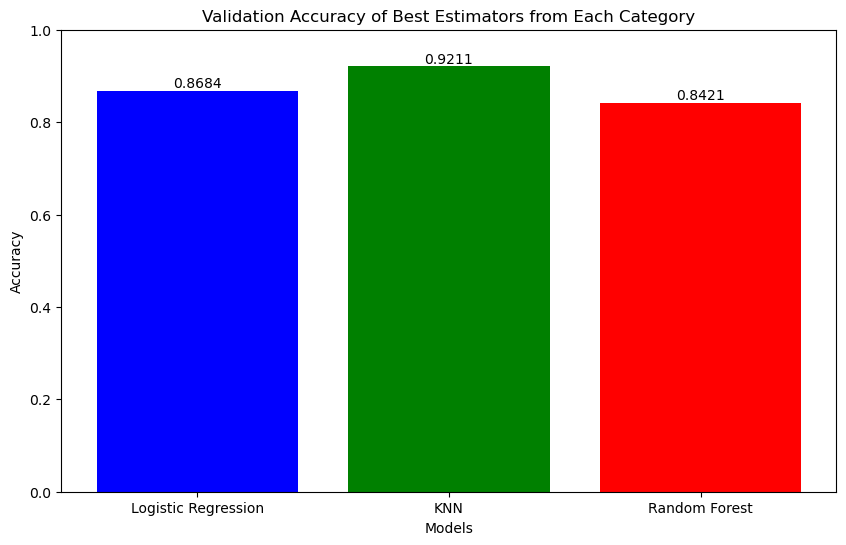

In [29]:
import matplotlib.pyplot as plt

# Model names
best_models = ['Logistic Regression', 'KNN', 'Random Forest']

# Corresponding accuracies (ensure these variables are defined)
accuracies = [accuracy_val_best_log_reg, accuracy_val_best_knn, accuracy_val_best_rf]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(best_models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy of Best Estimators from Each Category')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', 
             ha='center', va='bottom')

plt.show()

### 2.5 Confusion Matrix for Best Models on Validation Dataset

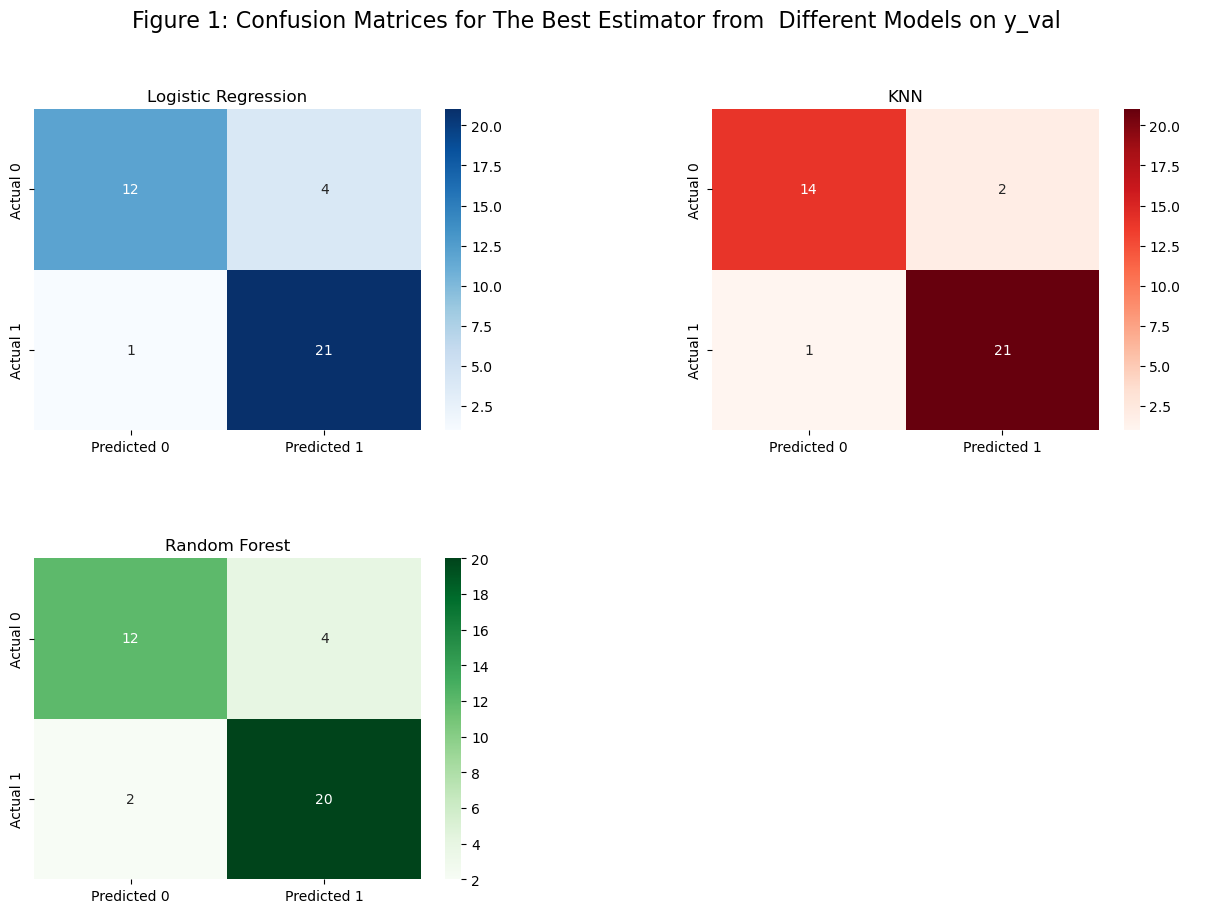

In [37]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Add a main title
fig.suptitle('Figure 1: Confusion Matrices for The Best Estimator from  Different Models on y_val', fontsize=16)

# Plot the confusion matrix for Logistic Regression
sns.heatmap(conf_mat_val_best_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')

# Plot the confusion matrix for KNN
sns.heatmap(conf_mat_val_best_knn, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[0, 1])
axes[0, 1].set_title('KNN')

# Plot the confusion matrix for Random Forest
sns.heatmap(conf_mat_val_best_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[1, 0])
axes[1, 0].set_title('Random Forest')

# Remove the empty subplot
axes[1, 1].axis('off')

# Adjust layout with spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

We can see that:


* We were able to improve the accuracy of `RandomForrestClassifier`, however, it still can't outperform `LogisticRegression` and `KNeighborsClassifier`
* The confusion matrix for `Logistic Regression` remains the same while for other the results has been improved slightly

* Similar the `accuracy_score` for `LogisticRegression` remains same while that for `KNeighborsClassifier` is improved.

* Thus we will proceed with `LogisticRegression` and `KNeighborsClassifier` for further evaluation on the test data 

## 3 Finalized Models to Use for Evaluation of Test Dataset

For the final comparison of models we will proceed with `best_knn_classifier` and `best_log_reg_classifier`. We will now evaluate each model on the test datse using the following metrics.
* Accuracy
* Confusion Matrix
* Classification Report
* Precision
* Recall
*  F1-score

### 3.1 Accuracy

In [38]:
# Make predictions on the test set using the best model
# Assign the best estimarot to a new variable  
y_pred_test_best_log_reg = best_log_reg_classifier.predict(X_test)
accuracy_test_best_log_reg = accuracy_score(y_test, y_pred_test_best_log_reg)

In [39]:
# Make predictions on the test set using the best KNN model

y_pred_test_best_knn = best_knn_classifier.predict(X_test)
accuracy_test_best_knn = accuracy_score(y_test, y_pred_test_best_knn)


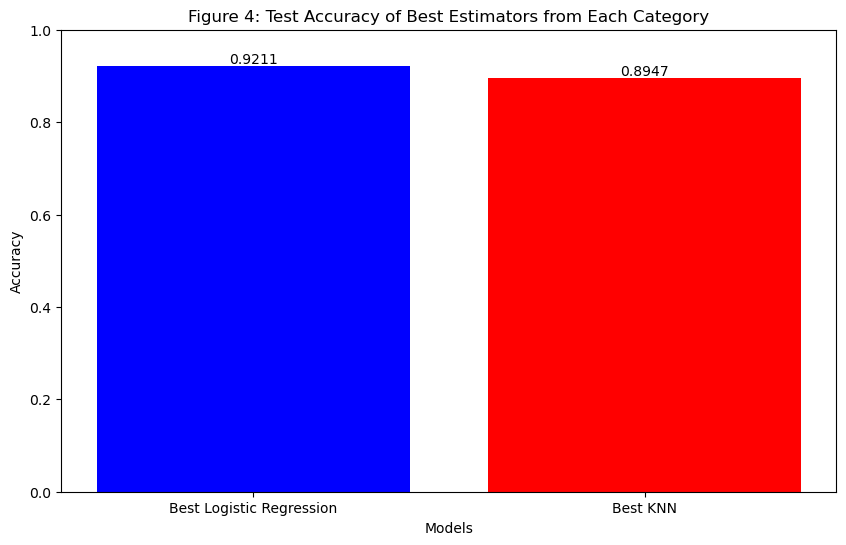

In [40]:
import matplotlib.pyplot as plt

# Model names
best_models = ['Best Logistic Regression', 'Best KNN', ]

# Corresponding accuracies (ensure these variables are defined)
accuracies = [accuracy_test_best_log_reg, accuracy_test_best_knn]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(best_models, accuracies, color=['blue', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Figure 4: Test Accuracy of Best Estimators from Each Category')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', 
             ha='center', va='bottom')

plt.show()

### 3.2 Confusion Matrix on Test Dataset

In [41]:
# log_reg
conf_mat_test_best_log_reg = confusion_matrix(y_test, y_pred_test_best_log_reg)
# KNN
conf_mat_test_best_knn = confusion_matrix(y_test, y_pred_test_best_knn)

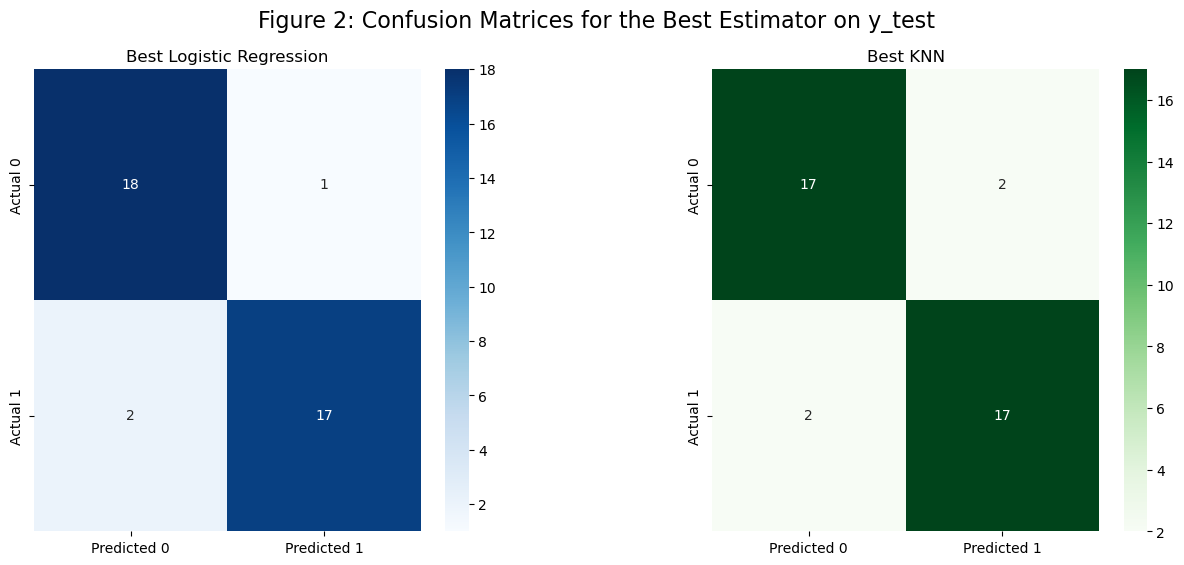

In [42]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Add a main title
fig.suptitle('Figure 2: Confusion Matrices for the Best Estimator on y_test', fontsize=16)

# Plot the confusion matrix for Logistic Regression
sns.heatmap(conf_mat_test_best_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[0])
axes[0].set_title('Best Logistic Regression')

# Plot the confusion matrix for KNN
sns.heatmap(conf_mat_test_best_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'], ax=axes[1])
axes[1].set_title('Best KNN')

# Adjust layout with spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


### 3.3 Classification Report

In [43]:
print("Best Logistic Regression Model Test Classification Report:\n", classification_report(y_test, y_pred_test_best_log_reg))


Best Logistic Regression Model Test Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.94      0.89      0.92        19

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [44]:
print("Best KNN Model Test Classification Report:\n", classification_report(y_test, y_pred_test_best_knn))

Best KNN Model Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.89      0.89      0.89        19

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38



### 3.4 ROC Curve and AUC

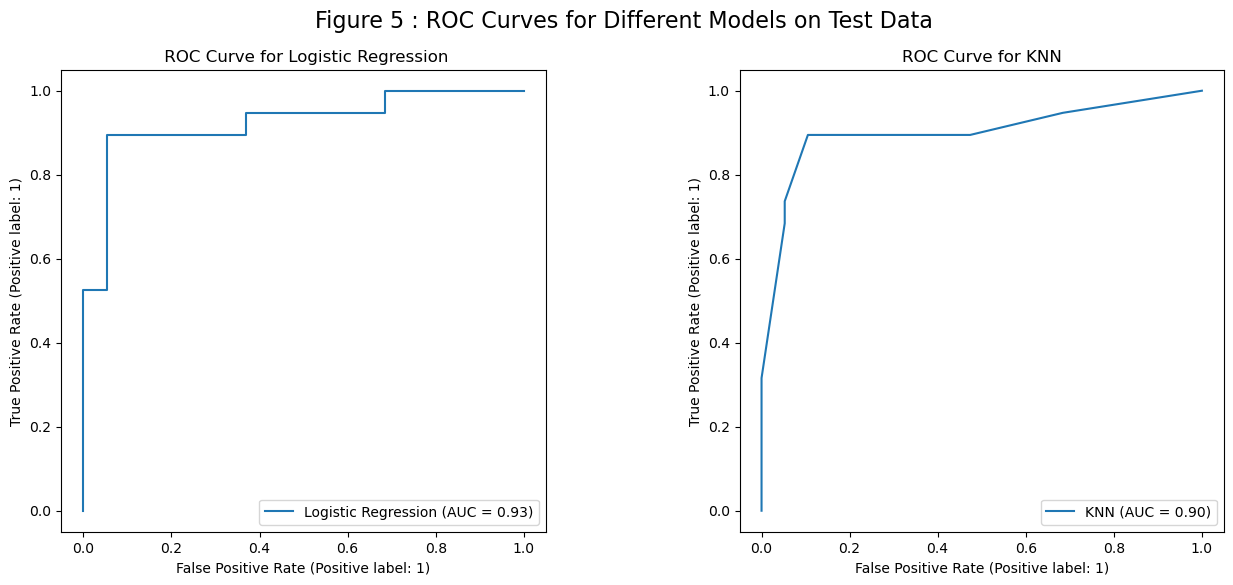

In [45]:
# Get the predicted probabilities for the test set
y_pred_proba_test_best_log_reg = best_log_reg_classifier.predict_proba(X_test)
y_pred_proba_test_best_knn = best_knn_classifier.predict_proba(X_test)

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the ROC curve for Logistic Regression
RocCurveDisplay.from_predictions(y_test, y_pred_proba_test_best_log_reg[:, 1], name='Logistic Regression', ax=axes[0])
axes[0].set_title(' ROC Curve for Logistic Regression')

# Plot the ROC curve for KNN
RocCurveDisplay.from_predictions(y_test, y_pred_proba_test_best_knn[:, 1], name='KNN', ax=axes[1])
axes[1].set_title('ROC Curve for KNN')

# Add a main title
fig.suptitle('Figure 5 : ROC Curves for Different Models on Test Data', fontsize=16)

# Adjust layout with spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

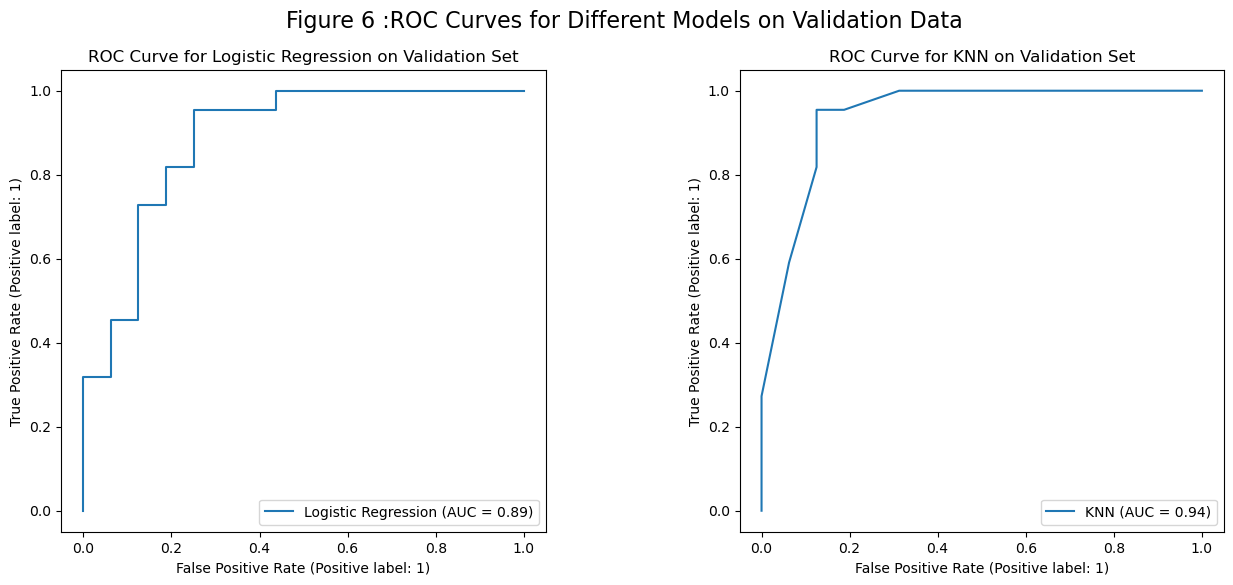

In [46]:
# Get the predicted probabilities for the validation set
y_pred_proba_val_best_log_reg = best_log_reg_classifier.predict_proba(X_val)
y_pred_proba_val_best_knn = best_knn_classifier.predict_proba(X_val)

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the ROC curve for Logistic Regression on validation set
RocCurveDisplay.from_predictions(y_val, y_pred_proba_val_best_log_reg[:, 1], name='Logistic Regression', ax=axes[0])
axes[0].set_title('ROC Curve for Logistic Regression on Validation Set')

# Plot the ROC curve for KNN on validation set
RocCurveDisplay.from_predictions(y_val, y_pred_proba_val_best_knn[:, 1], name='KNN', ax=axes[1])
axes[1].set_title('ROC Curve for KNN on Validation Set')

# Add a main title
fig.suptitle('Figure 6 :ROC Curves for Different Models on Validation Data', fontsize=16)

# Adjust layout with spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

## 4 Cross Validate Accuracy, precision, Recall and F1_Score

Since it is hard to decide which model perform better overall, to make the final call I decided to use cross valided accuracy  on whole dataset, which might provide better idea about the model

### 4.1 For Logistic Regression

In [74]:
# Cross-validation for accuracy
cv_accuracy_log_reg = cross_val_score(best_log_reg_classifier, X, y, cv=5, scoring="accuracy")
cv_accuracy_log_reg = np.mean(cv_accuracy_log_reg)

# Cross-validation for precision
cv_precision_log_reg = cross_val_score(best_log_reg_classifier, X, y, cv=5, scoring="precision")
cv_precision_log_reg = np.mean(cv_precision_log_reg)

# Cross-validation for recall
cv_recall_log_reg = cross_val_score(best_log_reg_classifier, X, y, cv=5, scoring="recall")
cv_recall_log_reg = np.mean(cv_recall_log_reg)

# Cross-validation for F1 score
cv_f1_log_reg = cross_val_score(best_log_reg_classifier, X, y, cv=5, scoring="f1")
cv_f1_log_reg = np.mean(cv_f1_log_reg)

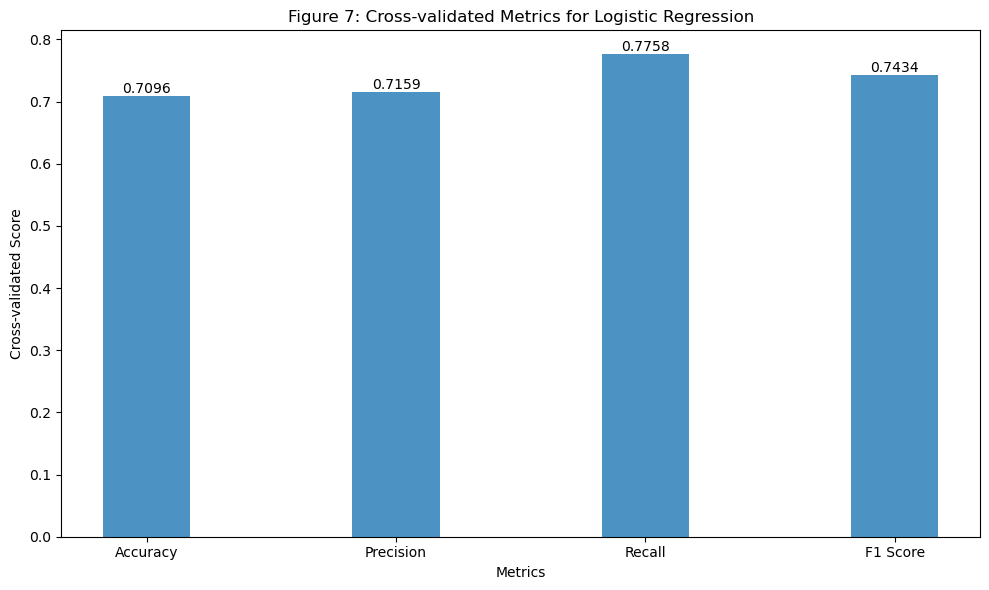

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Define the metrics and models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['Logistic Regression']

cv_results_log_reg = [cv_accuracy_log_reg, cv_precision_log_reg, cv_recall_log_reg, cv_f1_log_reg]

# Create a bar plot
bar_width = 0.35
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))

# Plot bars for Logistic Regression
bars = plt.bar(index, cv_results_log_reg, bar_width, alpha=0.8)

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Cross-validated Score')
plt.title('Figure 7: Cross-validated Metrics for Logistic Regression')
plt.xticks(index, metrics)

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

### 4.2 For KNN

In [53]:
# Cross-validation for accuracy
cv_accuracy_knn = cross_val_score(best_knn_classifier, X, y, cv=5, scoring="accuracy")
cv_accuracy_knn = np.mean(cv_accuracy_knn)

# Cross-validation for precision
cv_precision_knn = cross_val_score(best_knn_classifier, X, y, cv=5, scoring="precision")
cv_precision_knn = np.mean(cv_precision_knn)

# Cross-validation for recall
cv_recall_knn = cross_val_score(best_knn_classifier, X, y, cv=5, scoring="recall")
cv_recall_knn = np.mean(cv_recall_knn)

# Cross-validation for F1 score
cv_f1_knn = cross_val_score(best_knn_classifier, X, y, cv=5, scoring="f1")
cv_f1_knn = np.mean(cv_f1_knn)

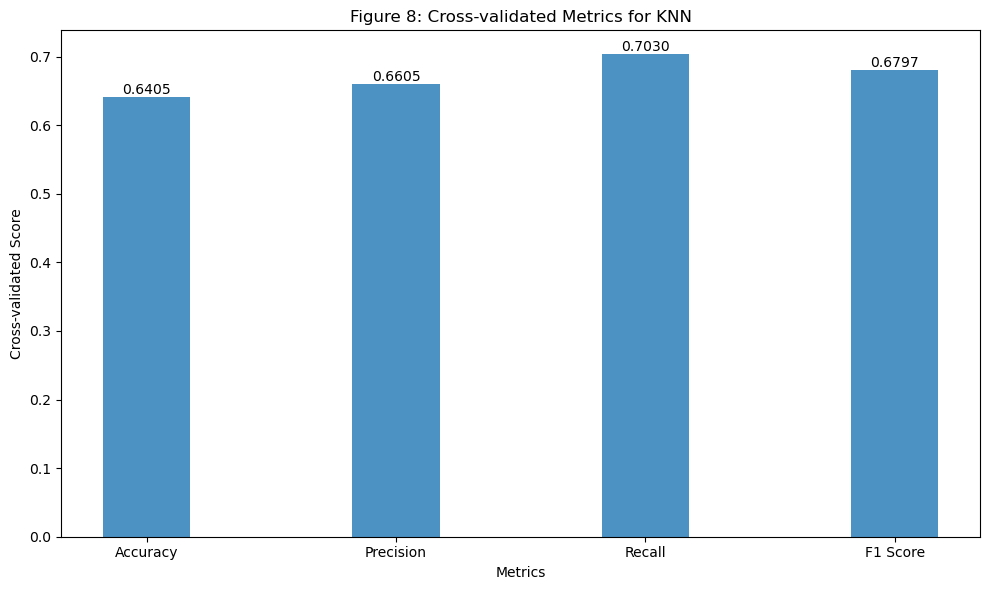

In [55]:
# Define the metrics and models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['KNN']

# Cross-validation results for KNN
cv_results_knn = [cv_accuracy_knn, cv_precision_knn, cv_recall_knn, cv_f1_knn]

# Create a bar plot
bar_width = 0.35
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))

# Plot bars for KNN
bars = plt.bar(index, cv_results_knn, bar_width, alpha=0.8)

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Cross-validated Score')
plt.title('Figure 8: Cross-validated Metrics for KNN')
plt.xticks(index, metrics)

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

Based on the Cross-Validate metrics, the best model to choose is Logistic Regression.

## 6 Final Choses Model

In [56]:
final_model = best_log_reg_classifier

y_pred_train_final_model = final_model.predict(X_train)
y_pred_test_final_model = final_model.predict(X_test)

In [57]:
# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, y_pred_train_final_model)

# Calculate accuracy for the test set
test_accuracy = accuracy_score(y_test, y_pred_test_final_model)

In [58]:
# Print the accuracies
print(f"Final Training Accuracy: {train_accuracy:.4f}")

print(' ')
print(' ')
print(f"Final Test Accuracy: {test_accuracy:.4f}")

Final Training Accuracy: 0.8282
 
 
Final Test Accuracy: 0.9211
